In [ ]:
# Date    :   2024-12-22
# Author  :   Dongwoo Yoon
# Contact :   dbsehddn0901@gmail.com

# 1 . Download dataset
Íµ¨Í∏Ä Ïù¥ÎØ∏ÏßÄÏôÄ Ïú†ÌäúÎ∏å ÎèôÏòÅÏÉÅÏóêÏÑú Ï∫°Ï≤òÌïú Ïù¥ÎØ∏ÏßÄÎ•º ÌôúÏö©ÌïòÏó¨ roboflowÏóêÏÑú Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò ÏûëÏóÖÏùÑ ÏôÑÎ£åÌñàÏäµÎãàÎã§.

ÏûëÏóÖÏù¥ ÎÅùÎÇú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ RoboflowÏùò APIÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îã§Ïö¥Î°úÎìúÌñàÏäµÎãàÎã§.

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="‚ñí‚ñí‚ñí‚ñí‚ñí‚ñí‚ñí‚ñí‚ñí‚ñí")
project = rf.workspace("dongwoo-k0nzb").project("hornet-detection-dikcl")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
# data.yaml ÎÇ¥Ïóê train, val, test dataset ÏÉÅÎåÄÍ≤ΩÎ°úÎ•º Ï†àÎåÄÍ≤ΩÎ°úÎ°ú ÏàòÏ†ï
!sed -i 's|\.\./|/content/Hornet-Detection-1/|g' ./Hornet-Detection-1/data.yaml

# 2 . Random images

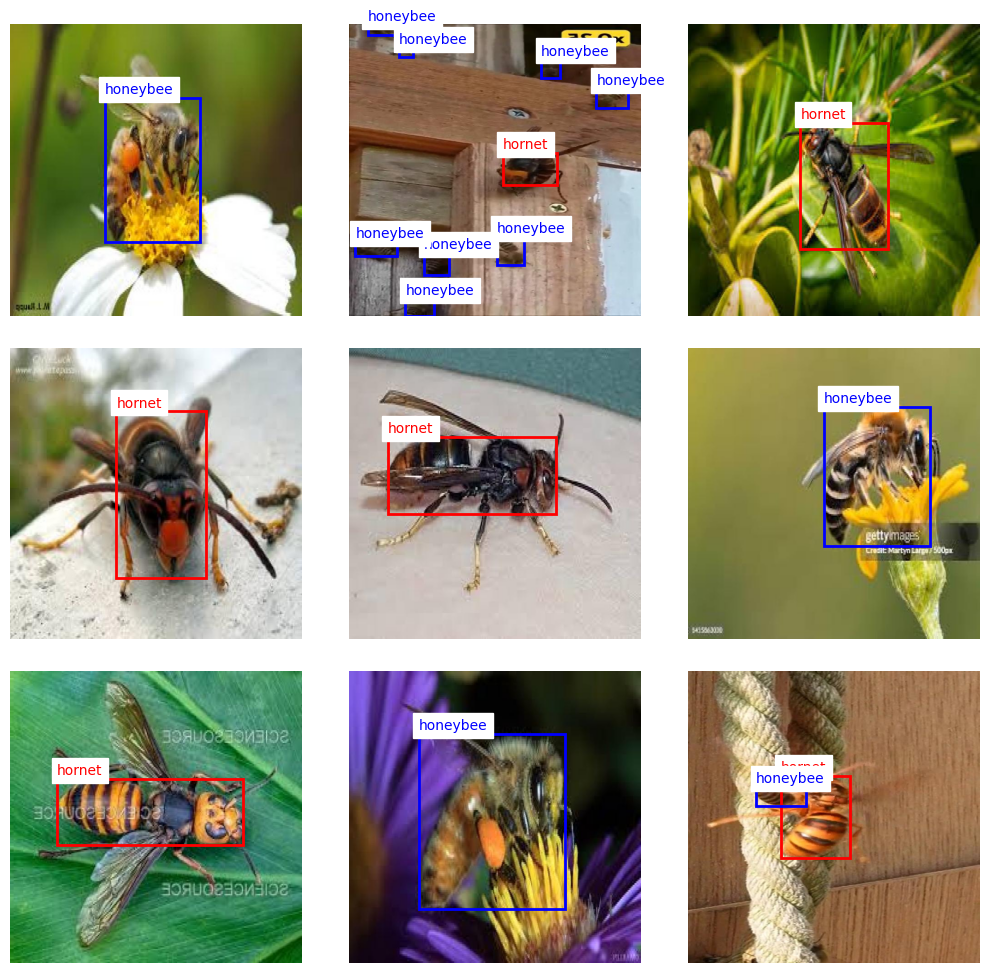

In [80]:
import os
import random
import matplotlib.pyplot as plt

# Ïù¥ÎØ∏ÏßÄ Î∞è ÎùºÎ≤® Ìè¥Îçî Í≤ΩÎ°ú
image_folder = 'Hornet-Detection-1/train/images'
label_folder = 'Hornet-Detection-1/train/labels'

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏ (Ïòà: YOLOv8 `data.yaml` ÌååÏùºÏóêÏÑú Í∞ÄÏ†∏Ïò¥)
class_names = ['honeybee', 'hornet']  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ

# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
class_colors = {
    'honeybee': 'blue',
    'hornet': 'red'
}

# Ìè¥Îçî ÎÇ¥Ïùò Î™®Îì† .jpg ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# ÎûúÎç§ÏúºÎ°ú 9Í∞úÏùò Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù
random_images = random.sample(image_files, 9)

# 3x3 Í∑∏Î¶¨ÎìúÎ°ú Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 Í∑∏Î¶¨Îìú, ÌÅ¨Í∏∞ ÏÑ§Ï†ï

for ax, img_file in zip(axes.flat, random_images):
    # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Î∞è Î°úÎìú
    img_path = os.path.join(image_folder, img_file)
    img = plt.imread(img_path)

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏóê ÎåÄÏùëÎêòÎäî ÎùºÎ≤® ÌååÏùº Í≤ΩÎ°ú
    label_file = os.path.join(label_folder, img_file.replace('.jpg', '.txt'))

    # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    ax.imshow(img)
    ax.axis('off')  # Ï∂ï Ïà®Í∏∞Í∏∞

    # ÎùºÎ≤® ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f:
                # YOLOv8 ÌòïÏãù ÎùºÎ≤® ÌååÏã±
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                class_name = class_names[int(class_id)]
                box_color = class_colors[class_name]  # ÌÅ¥ÎûòÏä§Ïóê ÎßûÎäî ÏÉâÏÉÅ

                # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Î≥ÄÌôò (YOLO ÌòïÏãù -> ÌîΩÏÖÄ Ï¢åÌëú)
                img_h, img_w = img.shape[:2]
                x_center *= img_w
                y_center *= img_h
                width *= img_w
                height *= img_h

                # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÏÉÅÎã® (x1, y1) Î∞è Ïö∞ÌïòÎã® (x2, y2) Í≥ÑÏÇ∞
                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                # Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è Î†àÏù¥Î∏î Í∑∏Î¶¨Í∏∞
                ax.add_patch(plt.Rectangle((x1, y1), width, height, edgecolor=box_color, facecolor='none', linewidth=2))
                ax.text(x1, y1 - 10, class_name, color=box_color, fontsize=10, backgroundcolor='white')

plt.tight_layout()
plt.show()


# 3 . Load a pre-trained model (YOLO)

In [ ]:
!pip3 install ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.53 üöÄ Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 32.7/235.7 GB disk)


In [ ]:
model = YOLO('yolov8n.pt') #yolov8n(ÎÇòÎÖ∏), yolov8s(Ïä§Î™∞), yolov8m(ÎØ∏ÎîîÏõÄ), yolov8l(ÎùºÏßÄ), yolov8x(ÏóëÏä§Ìä∏Îùº) Îì±Ïù¥ ÏûàÏùå

# 4 . Model training

In [ ]:
project = "runs/detect"
train_name = "train"
dataset_path = "Hornet-Detection-1/data.yaml"

In [ ]:
model.train(
    data=dataset_path,  # Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú, ÏùºÎ∞òÏ†ÅÏúºÎ°ú YAML ÌååÏùº Í≤ΩÎ°úÎ•º ÏßÄÏ†ï
    epochs=200,         # ÌïôÏäµ Î∞òÎ≥µ ÌöüÏàò, ÏµúÎåÄ 200 ÏóêÌè¨ÌÅ¨ÍπåÏßÄ ÌïôÏäµ
    project=project,    # ÌîÑÎ°úÏ†ùÌä∏ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Ìè¥Îçî Ïù¥Î¶Ñ (Ïòà: 'runs')
    name=train_name,    # Ïã§Ìóò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† ÌïòÏúÑ Ìè¥Îçî Ïù¥Î¶Ñ (Ïòà: 'train')
    exist_ok=False,     # ÎèôÏùºÌïú Ìè¥ÎçîÍ∞Ä Ïù¥ÎØ∏ ÏûàÏùÑ Í≤ΩÏö∞ ÎçÆÏñ¥Ïì∞ÏßÄ ÏïäÍ≥† ÏóêÎü¨Î•º Î∞úÏÉùÏãúÌÇ¥
    seed=42,            # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï (Í≤∞Í≥ºÍ∞Ä ÎèôÏùºÌïòÎèÑÎ°ù Í≥†Ï†ï)
    optimizer='AdamW',  # AdamW ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÇ¨Ïö© (L2 Ï†ïÍ∑úÌôîÎ•º Ìè¨Ìï®Ìïú Adam Í∞úÏÑ† Î≤ÑÏ†Ñ)
    # patience=5,       # 5Î≤àÏùò ÏóêÌè¨ÌÅ¨ ÎèôÏïà Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ Ï°∞Í∏∞ Ï¢ÖÎ£å
    batch=32,           # Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï, Ìïú Î≤àÏóê 32Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Ï≤òÎ¶¨
    imgsz=640,          # ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞, Î™®Îç∏Ïùò ÏûÖÎ†• ÌÅ¨Í∏∞Î•º 640x640Î°ú Í≥†Ï†ï
    degrees=0.15,       # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï: Ïù¥ÎØ∏ÏßÄ ÌöåÏ†Ñ Î≤îÏúÑ ÏÑ§Ï†ï (-15¬∞ ~ +15¬∞)
    fliplr=0.5          # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï: 50% ÌôïÎ•†Î°ú Ïù¥ÎØ∏ÏßÄ Ï¢åÏö∞ Î∞òÏ†Ñ Ï†ÅÏö©
)


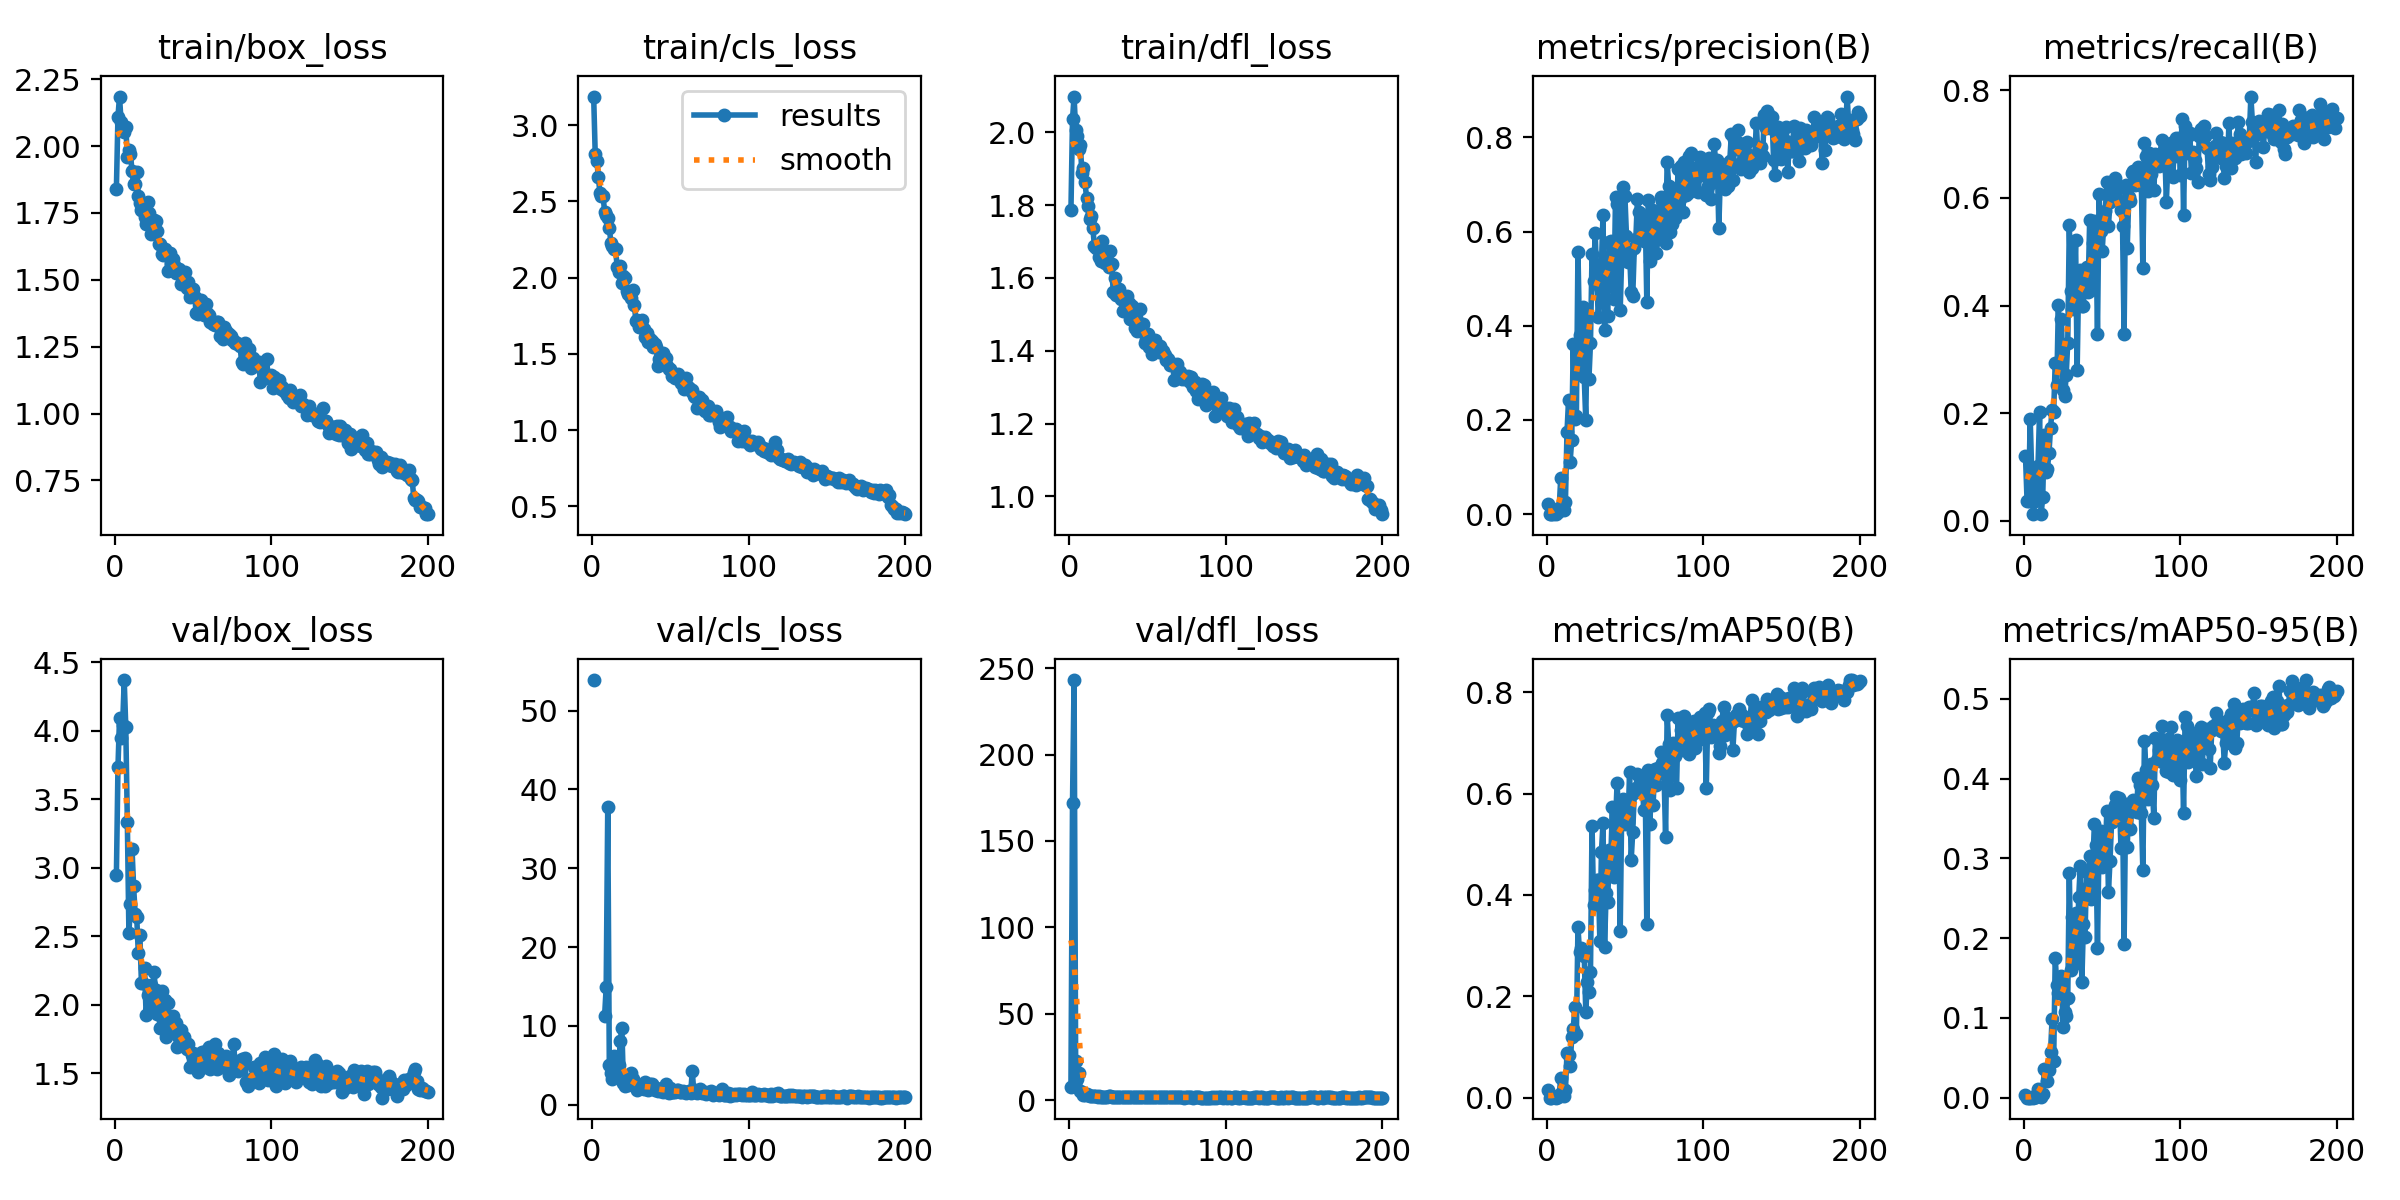

In [ ]:
from IPython.display import Image as show_image
show_image(f"{project}/{train_name}/results.png", width=800)

ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


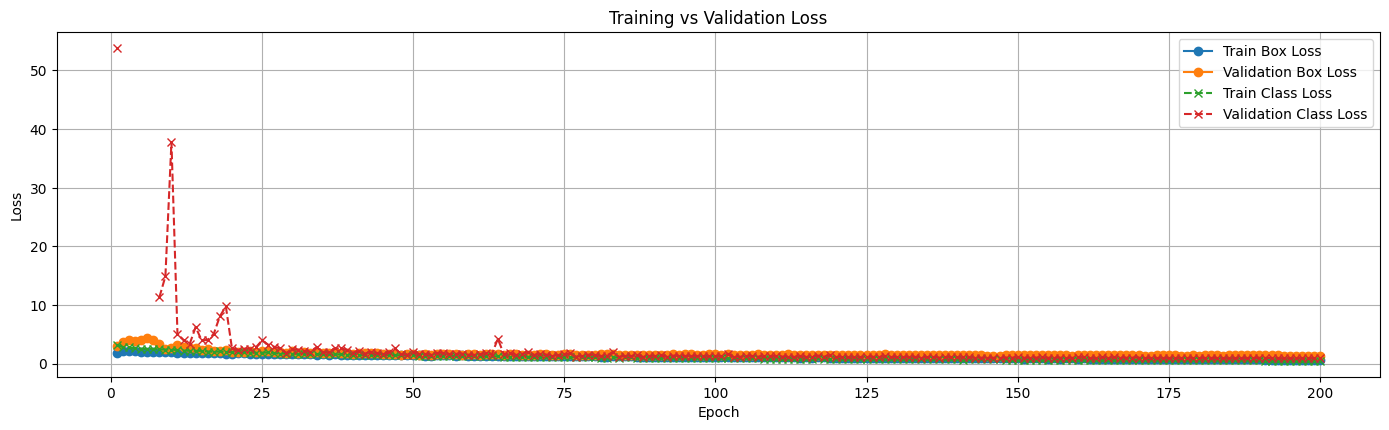

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ÌååÏùº Í≤ΩÎ°ú
results_csv = f'{project}/{train_name}/results.csv'
results_df = pd.read_csv(results_csv)

# Ïª¨Îüº Ï∂úÎ†• Î∞è ÌôïÏù∏
print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº:")
print(results_df.columns)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(14, 8))

# (1) ÏÜêÏã§ Í∑∏ÎûòÌîÑ: Train Loss vs Validation Loss
plt.subplot(2, 1, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss', marker='o')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss', linestyle='--', marker='x')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Class Loss', linestyle='--', marker='x')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# (2) Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ: Precision, Recall, mAP
if 'metrics/mAP_50' in results_df.columns:
    plt.subplot(2, 1, 2)
    if 'metrics/precision' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/precision'], label='Precision', marker='o')
    if 'metrics/recall' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/recall'], label='Recall', marker='o')
    if 'metrics/mAP_50' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/mAP_50'], label='mAP@50', linestyle='--', marker='x')
    if 'metrics/mAP_50-95' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/mAP_50-95'], label='mAP@50-95', linestyle='--', marker='x')
    plt.title('Precision, Recall, and mAP')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend()
    plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()


# 5 . Load best.pt


In [ ]:
# ÏµúÏ†ÅÏùò ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ Î™®Îç∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
model = YOLO(f"{project}/{train_name}/weights/best.pt")

In [ ]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 2
{0: 'honeybee', 1: 'hornet'}


# 6 . Model evaluation

In [ ]:
test_name = "test" # ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Ìè¥Îçî Ïù¥Î¶Ñ ÏÑ§Ï†ï
test_result = model.val(imgsz=640, split="test", name=test_name) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌèâÍ∞Ä Ïã§Ìñâ

Ultralytics 8.3.53 üöÄ Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Hornet-Detection-1/test/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 45/45 [00:00<00:00, 1563.03it/s]

val: New cache created: /content/Hornet-Detection-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.21it/s]


                   all         45        147       0.81      0.656      0.735      0.471
              honeybee         24        106      0.842      0.604       0.73      0.404
                hornet         31         41      0.778      0.707      0.741      0.538
Speed: 0.5ms preprocess, 24.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/test


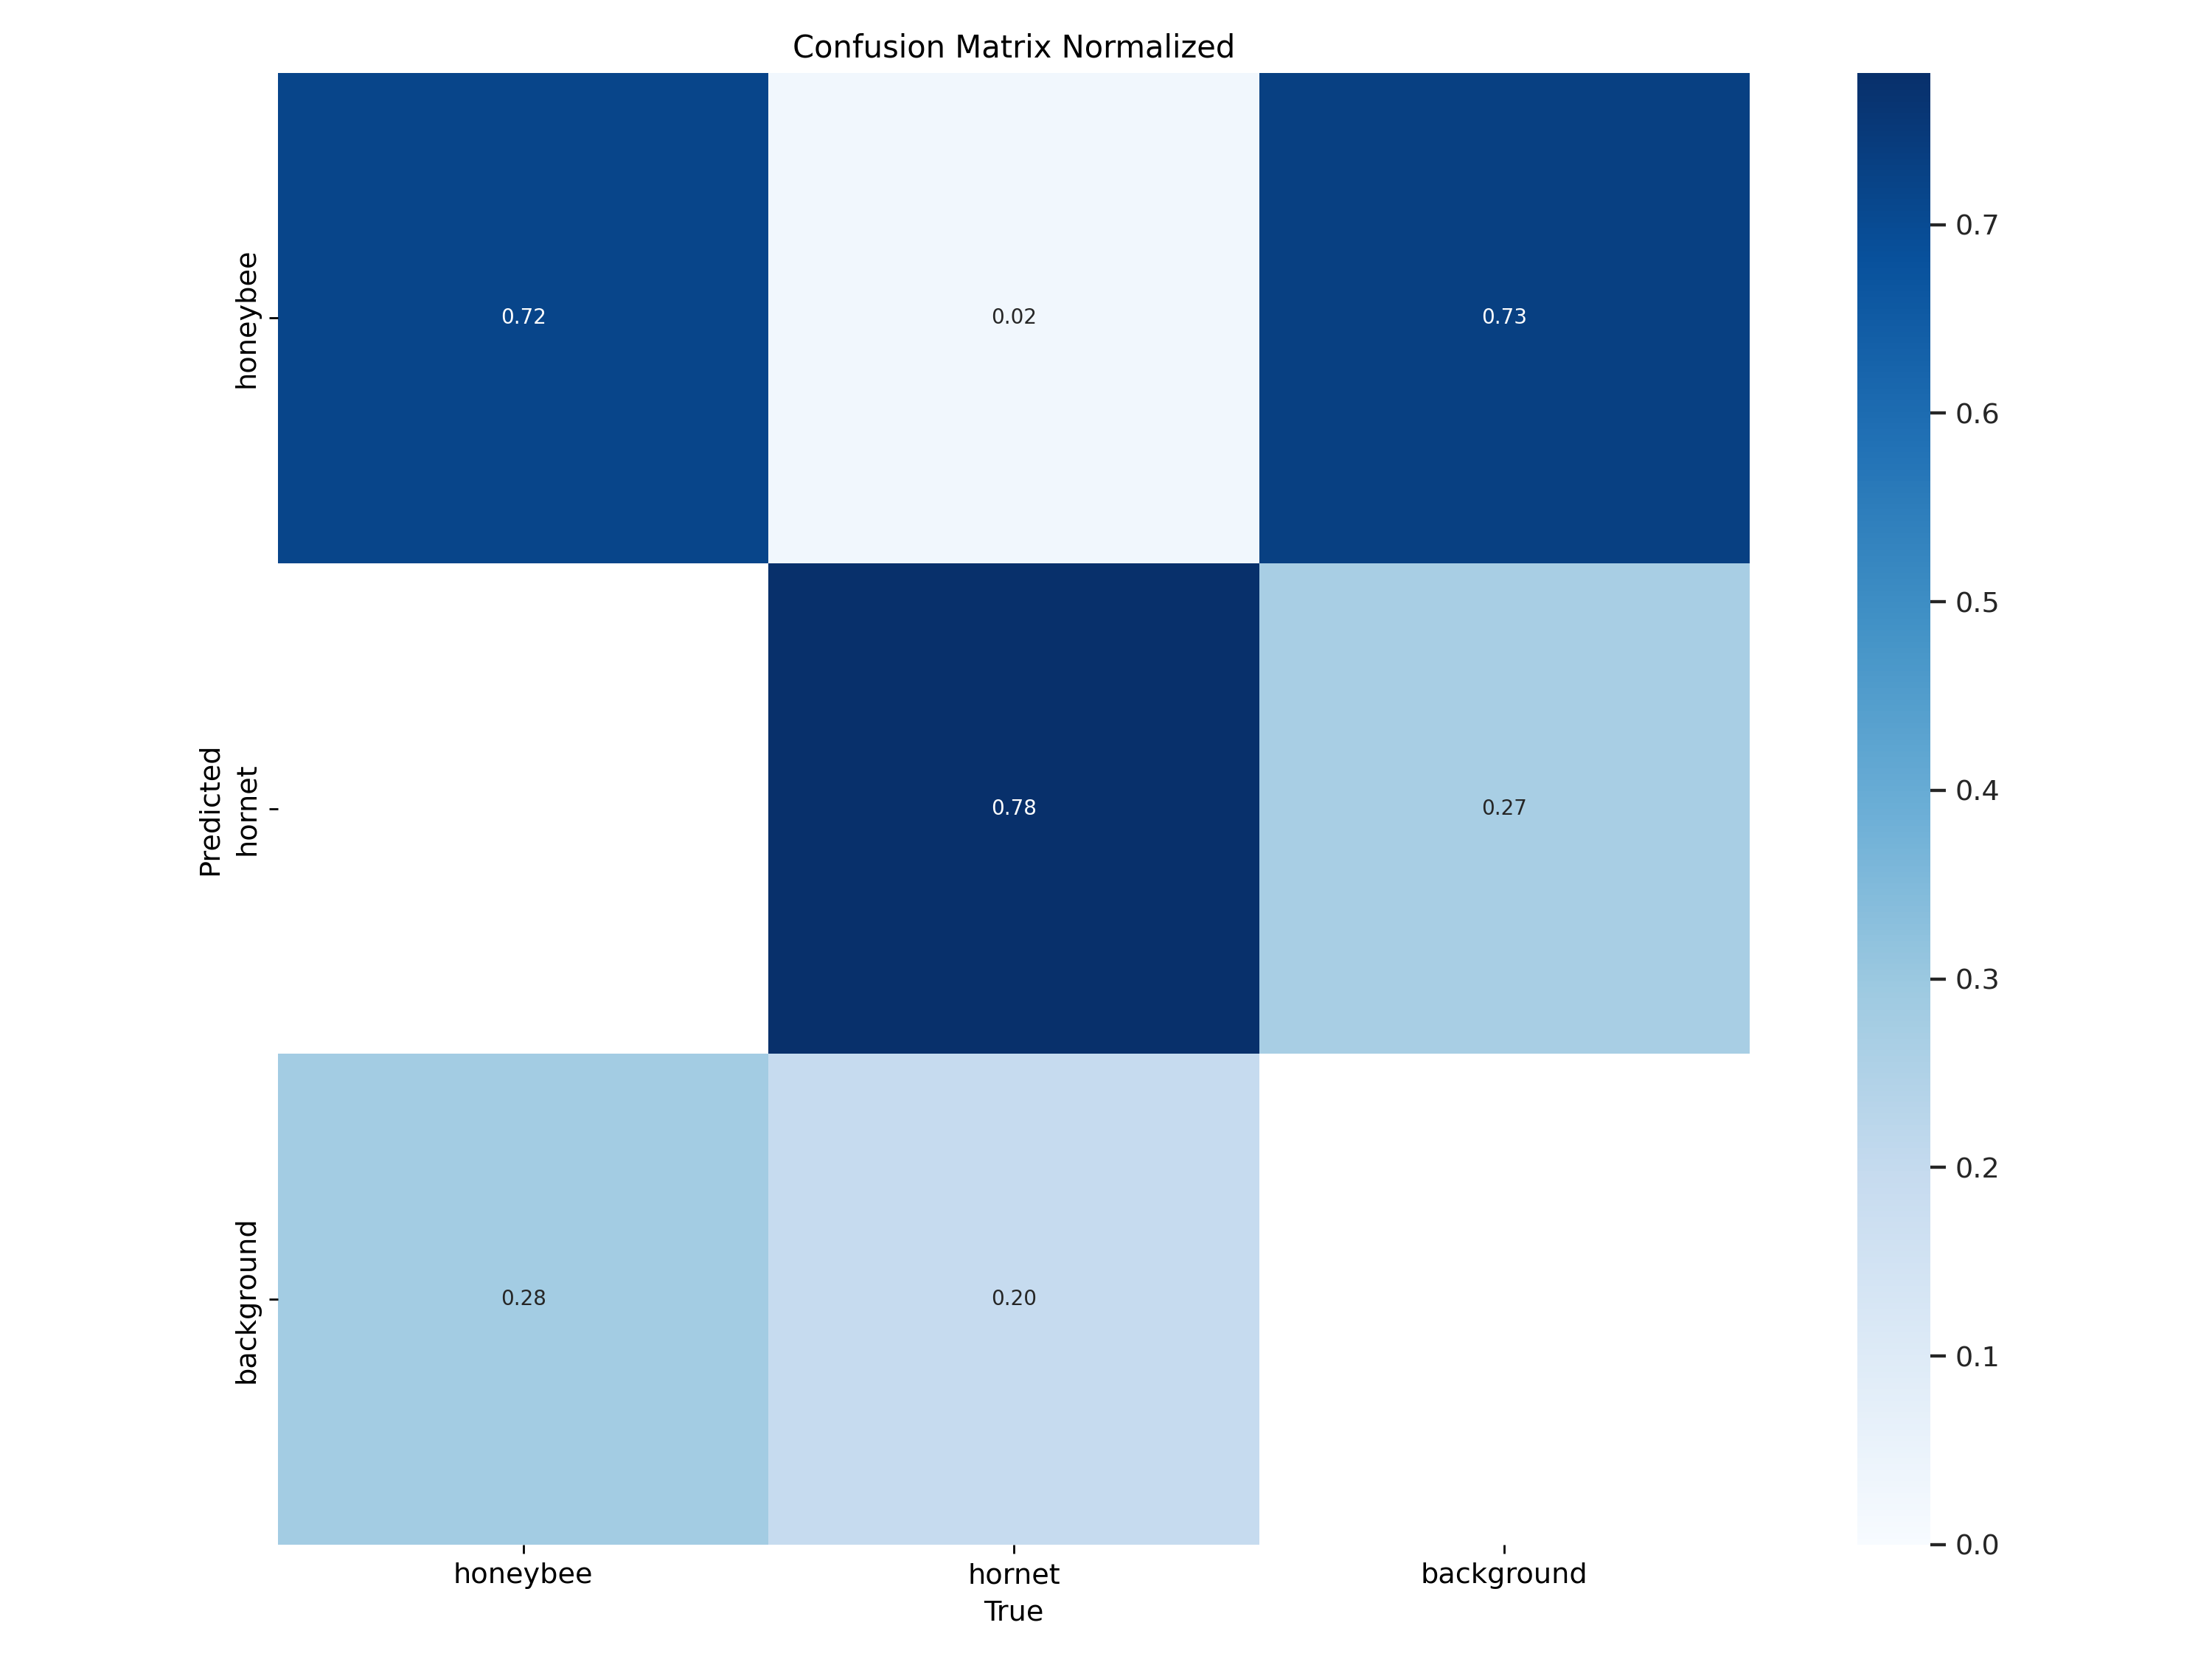

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤∞Í≥ºÎ•º ÌòºÎèô ÌñâÎ†¨ Ïù¥ÎØ∏ÏßÄÎ°ú ÏãúÍ∞ÅÌôî
show_image(f"{project}/{test_name}/confusion_matrix_normalized.png", width=800, height=800)

# 7 . Inference

In [ ]:
from tqdm import tqdm
import glob

inference_name = "inference"
image_paths = glob.glob('Hornet-Detection-1/test/images/*jpg')
# ÏÑ§Ï†ïÌïú Î∞∞Ïπò ÌÅ¨Í∏∞
batch_size = 4

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º Î∞∞Ïπò ÌÅ¨Í∏∞Ïóê ÎßûÏ∂∞ Î∂ÑÌï†
inference_results = []
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i + batch_size]
    results = model.predict(project=project,
                            source=batch_paths,
                            name=inference_name,
                            device='cuda',
                            imgsz=640,
                            save=True,
                            save_txt=True,
                            save_conf=True,
                            show_conf=False,
                            exist_ok=True)

    # Í≤∞Í≥ºÏóêÏÑú ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏÇ≠Ï†úÌïòÏó¨ Î©îÎ™®Î¶¨ Ï†àÏïΩ
    for item in results:
        del item.orig_img
    inference_results.append(results)
# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à ÎßåÌÅº Î¨∂Ïó¨ ÏûàÎäî Î¶¨Ïä§Ìä∏Î•º ÌíÄÏñ¥Ï§å
inference_results = sum(inference_results,[])

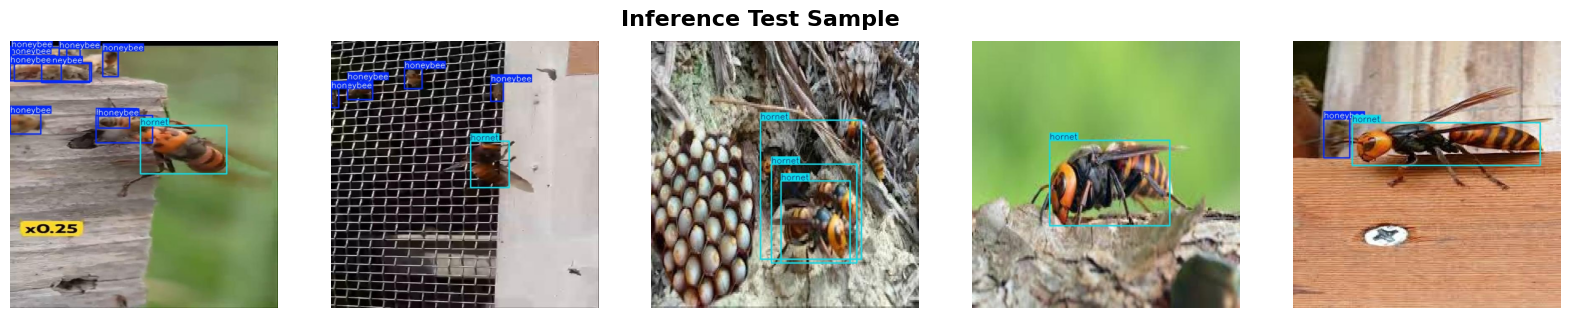

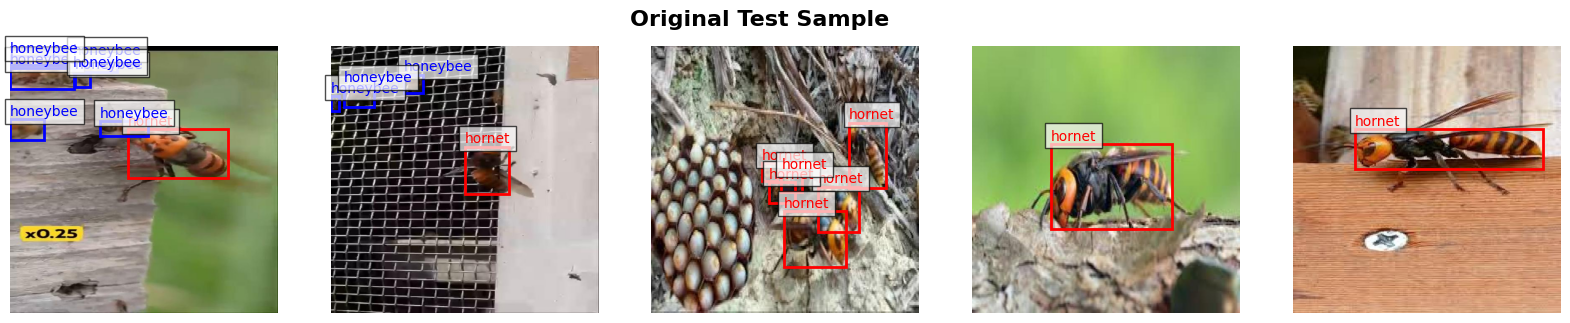

In [ ]:
import glob
import random
import matplotlib.pyplot as plt
import os

# YOLOv8 ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÍ≥º ÏÉâÏÉÅ ÏÑ§Ï†ï
class_names = ['honeybee', 'hornet']  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
class_colors = {'honeybee': 'blue', 'hornet': 'red'}  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉâÏÉÅ

# Í≤ΩÎ°ú ÏÑ§Ï†ï
inference_paths = glob.glob(f'{project}/{inference_name}/*jpg')  # Ï∂îÎ°† Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
test_image_base = 'Hornet-Detection-1/test/images'  # ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Í∏∞Î≥∏ Í≤ΩÎ°ú
test_label_base = 'Hornet-Detection-1/test/labels'  # ÌÖåÏä§Ìä∏ ÎùºÎ≤® Í∏∞Î≥∏ Í≤ΩÎ°ú

# 5Í∞úÏùò ÎûúÎç§ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ†ÌÉù
random_paths = random.sample(inference_paths, 5)

# Í≥µÌÜµ Ìï®Ïàò: Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
def draw_bounding_boxes(ax, img, label_file):
    """Ïù¥ÎØ∏ÏßÄÏóê Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î¶¨Îäî Ìï®Ïàò"""
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f:
                # YOLOv8 ÎùºÎ≤® ÌååÏã±
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                class_name = class_names[int(class_id)]
                box_color = class_colors[class_name]

                # YOLO ÌòïÏãù -> ÌîΩÏÖÄ Ï¢åÌëú Î≥ÄÌôò
                img_h, img_w = img.shape[:2]
                x_center *= img_w
                y_center *= img_h
                width *= img_w
                height *= img_h
                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)

                # Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è Î†àÏù¥Î∏î Ï∂îÍ∞Ä
                ax.add_patch(plt.Rectangle((x1, y1), width, height, edgecolor=box_color, facecolor='none', linewidth=2))
                ax.text(x1, y1 - 10, class_name, color=box_color, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# (1) Ï∂îÎ°† Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1Ìñâ 5Ïó¥
for ax, random_path in zip(axes, random_paths):
    image = plt.imread(random_path)
    ax.imshow(image)
    ax.axis('off')
fig.suptitle('Inference Test Sample', fontsize=16, fontweight='bold', y=0.81)
fig.subplots_adjust(top=0.85)  # Ï†úÎ™©Í≥º Ïù¥ÎØ∏ÏßÄ Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†ï
plt.show()

# (2) ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌëúÏãú
fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # 1Ìñâ 5Ïó¥
for ax, img_path in zip(axes, random_paths):
    # Í≤ΩÎ°ú Î≥ÄÍ≤Ω
    test_img_path = img_path.replace(f'{project}/{inference_name}', test_image_base)
    test_label_path = test_img_path.replace(".jpg", ".txt").replace("images", "labels")

    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è ÌëúÏãú
    img = plt.imread(test_img_path)
    ax.imshow(img)
    ax.axis('off')

    # Î∞îÏö¥Îî© Î∞ïÏä§ Ï∂îÍ∞Ä
    draw_bounding_boxes(ax, img, test_label_path)
fig.suptitle('Original Test Sample', fontsize=16, fontweight='bold', y=0.65)
fig.subplots_adjust(top=0.85)  # Ï†úÎ™©Í≥º Ïù¥ÎØ∏ÏßÄ Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†ï
plt.show()
